# PyTorch Neural Network Digits Classifier
**Dataset:** MNIST

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import matplotlib.pyplot as plt
from torchvision import datasets, transforms

from torch import nn
from torch import optim
import torch.nn.functional as F

**Download _MNIST_ dataset**  
I will be using batches of 64

In [2]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Processing...
Done!


In [27]:
def translate_label(label):
    labels_dict = {0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9:'Ankle boot' }
    
    return labels_dict[label]

In [28]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [29]:
def print_sample_digit(index):
    print(str.format('Label: {}',translate_label(int(labels[index]))))
    plt.figure(num=None, figsize=(1, 1), dpi=56, facecolor='w', edgecolor='k')
    plt.imshow(images[index].numpy().squeeze(), cmap='Greys_r');

Label: Pullover


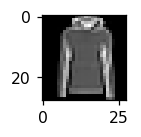

In [30]:
print_sample_digit(0)

Label: T-shirt/top


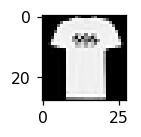

In [31]:
print_sample_digit(1)

In [32]:
# Input are images of 28 x 28 pixels each
input_size = 784 
# Hidden layers size
h1_size, h2_size, h3_size = 400,200,100 
# Output will be 10 since we will get the softmax probability for each digit (0-9)
output_size = 10 

### Define the model

In [33]:
model = nn.Sequential(
            nn.Linear(input_size, h1_size),
            nn.ReLU(),
            nn.Linear(h1_size, h2_size),
            nn.ReLU(),
            nn.Linear(h2_size, h3_size),
            nn.ReLU(),
            nn.Linear(h3_size, output_size)
            )        

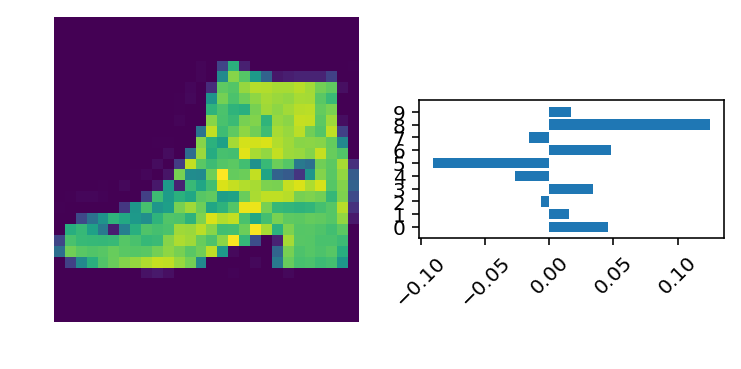

In [34]:
# Get images and labels
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)

# Feedforward the network
ps = model.forward(images[0,:])

# Print result for the first image
fig, (ax1, ax2) = plt.subplots(figsize=(6,6), ncols=2)
ps = ps.data.numpy().squeeze()

ax1.imshow(images[0].resize_(1, 28, 28).numpy().squeeze())
ax1.axis('off')

ax2.barh(np.arange(10), ps )
ax2.set_aspect(0.01)
ax2.set_yticks(np.arange(10))
plt.xticks(rotation='45')

plt.show();

# Right now since the Neural Network did not update weights yet all probabilities are roughtly the same

In [35]:
# Define the Loss Function
criterion = nn.CrossEntropyLoss() 

# Define optimizer as Stochastic Gradient Descent with a learning rate of 0.01
sgd_optimizer = optim.SGD(model.parameters(), lr = 0.003)

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

### Time to train the Neural Network!

In [36]:
epochs = 5
print_every = 40
steps = 0

for epoch in range(epochs):
    running_loss = 0
    
    # Get images and labels
    for images, labels in iter(trainloader):
        steps += 1
        images.resize_(images.size()[0], input_size)
        
        # Set gradients to zero
        sgd_optimizer.zero_grad()
        
        y_hat = model.forward(images)
        loss = criterion(y_hat,labels)
        loss.backward()
        sgd_optimizer.step()
        
        running_loss += loss.item()
        
        if steps % print_every == 0:
            print("Epoch: {}/{}... ".format(epoch+1, epochs),
                  "Loss: {:.4f}".format(running_loss/print_every))
            
            running_loss = 0


Epoch: 1/5...  Loss: 2.3019
Epoch: 1/5...  Loss: 2.2988
Epoch: 1/5...  Loss: 2.2917
Epoch: 1/5...  Loss: 2.2821
Epoch: 1/5...  Loss: 2.2771
Epoch: 1/5...  Loss: 2.2693
Epoch: 1/5...  Loss: 2.2593
Epoch: 1/5...  Loss: 2.2505
Epoch: 1/5...  Loss: 2.2381
Epoch: 1/5...  Loss: 2.2264
Epoch: 1/5...  Loss: 2.2127
Epoch: 1/5...  Loss: 2.2001
Epoch: 1/5...  Loss: 2.1796
Epoch: 1/5...  Loss: 2.1491
Epoch: 1/5...  Loss: 2.1269
Epoch: 1/5...  Loss: 2.0964
Epoch: 1/5...  Loss: 2.0512
Epoch: 1/5...  Loss: 2.0232
Epoch: 1/5...  Loss: 1.9574
Epoch: 1/5...  Loss: 1.9190
Epoch: 1/5...  Loss: 1.8662
Epoch: 1/5...  Loss: 1.8040
Epoch: 1/5...  Loss: 1.7462
Epoch: 2/5...  Loss: 0.9182
Epoch: 2/5...  Loss: 1.6233
Epoch: 2/5...  Loss: 1.5778
Epoch: 2/5...  Loss: 1.5147
Epoch: 2/5...  Loss: 1.4685
Epoch: 2/5...  Loss: 1.4207
Epoch: 2/5...  Loss: 1.3739
Epoch: 2/5...  Loss: 1.3218
Epoch: 2/5...  Loss: 1.2901
Epoch: 2/5...  Loss: 1.2398
Epoch: 2/5...  Loss: 1.2223
Epoch: 2/5...  Loss: 1.1742
Epoch: 2/5...  Loss:

### Test the Neural Network

In [50]:
images, labels = next(iter(testloader))

img = images[0].view(1, 784)

# Turn off gradients to speed up this part
with torch.no_grad():
    logits = model.forward(img)

# Output of the network are logits, need to take softmax for probabilities
ps = F.softmax(logits, dim=1)
print(ps, labels[0])


tensor([[ 8.9693e-01,  1.1522e-05,  8.0896e-03,  5.2771e-03,  6.3381e-05,
          6.0101e-09,  8.9547e-02,  1.7098e-09,  7.9307e-05,  7.7921e-07]]) tensor(0)


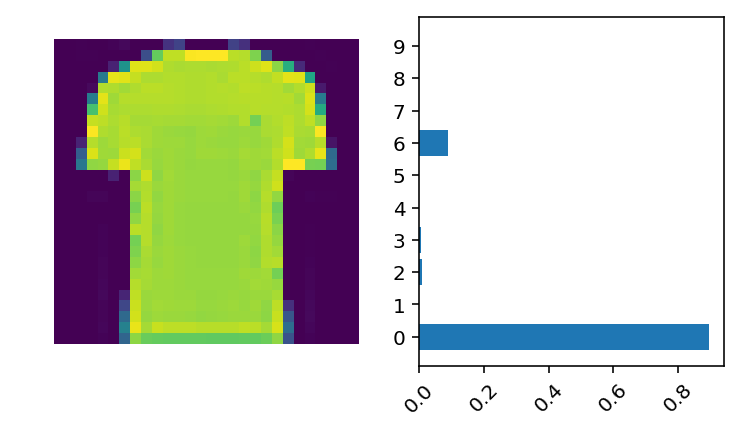

Label:  0


In [51]:
fig, (ax1, ax2) = plt.subplots(figsize=(6,6), ncols=2)
ps = ps.data.numpy().squeeze()

ax1.imshow(images[0].resize_(1, 28, 28).numpy().squeeze())
ax1.axis('off')

ax2.barh(np.arange(10), ps )
ax2.set_aspect(0.1)
ax2.set_yticks(np.arange(10))
plt.xticks(rotation='45')

plt.show();
print('Label: ', int(labels[0]))